## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import scipy as sp
import seaborn as sns
pd.options.mode.chained_assignment = None
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
import sklearn.metrics

from sklearn.preprocessing import PolynomialFeatures

2022-10-08 23:42:22.620219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("../data/curated/match_house22_s.csv")

In [3]:
# Select usefull columns
house = pd.DataFrame(df, columns=['price', 'suburb', 'beds', 'baths', 'parking',
       'latitudes', 'longitudes', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', '2022income', '2022house_price',
        'erp_2022', 'net_internal_migration_2021_22',
       'net_overseas_migration_2021_22', 'natural_increase_2021_22'])

In [4]:
# remove NaN and duplicates
house = house.dropna()
house.drop_duplicates(keep='first',inplace=True)
house


,price,suburb,beds,baths,parking,latitudes,longitudes,school,train_station,fitness_gym,hospital,shopping_center,park,2022income,2022house_price,erp_2022,net_internal_migration_2021_22,net_overseas_migration_2021_22,natural_increase_2021_22
0,1100,EAST MELBOURNE,4,2,1,-37.8101,144.9500,5246.2,843.7,516.0,960.7,737.0,3319.6,4224.0,444000.0,6335.2,-63.4,-191.0,-7.6
1,1100,EAST MELBOURNE,4,2,1,-37.8101,144.9500,5246.2,843.7,516.0,960.7,737.0,3319.6,4224.0,627700.0,6335.2,-63.4,-191.0,-7.6
2,1150,EAST MELBOURNE,4,2,0,-37.8167,144.9879,8137.6,381.0,345.9,620.2,1558.5,1235.1,4224.0,444000.0,6335.2,-63.4,-191.0,-7.6
3,1150,EAST MELBOURNE,4,2,0,-37.8167,144.9879,8137.6,381.0,345.9,620.2,1558.5,1235.1,4224.0,627700.0,6335.2,-63.4,-191.0,-7.6
4,525,EAST MELBOURNE,2,1,1,-37.8101,144.9500,5246.2,843.7,516.0,960.7,737.0,3319.6,4224.0,444000.0,6335.2,-63.4,-191.0,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,500,SOMERVILLE,3,2,2,-38.2186,145.2182,9392.4,6435.0,4854.6,10188.3,11544.9,3464.7,12174.6,596400.0,19780.6,-194.0,-28.4,108.2
702,550,COBURG NORTH,3,1,2,-37.7500,144.9667,3099.5,888.5,1617.6,1255.4,3204.2,1478.4,6241.4,656950.0,9538.6,-205.2,-79.8,45.6
703,350,SUNSHINE NORTH,3,1,1,-37.7750,144.8333,5655.2,1159.4,1384.3,3950.7,1418.2,474.8,7319.8,614750.0,12797.4,-347.2,-110.8,43.0
704,390,WALLAN,4,2,2,-37.4180,145.0166,56845.3,25412.9,16742.7,19610.5,25750.8,3562.8,13890.6,397400.0,22916.4,1393.0,-35.0,342.0


In [5]:
# Discretization
sub_list = pd.factorize(house["suburb"])[1]
house['suburbID'] = pd.factorize(house["suburb"])[0].astype(np.uint16)

In [6]:
house.describe()

,price,beds,baths,parking,latitudes,longitudes,school,train_station,fitness_gym,hospital,shopping_center,park,2022income,2022house_price,erp_2022,net_internal_migration_2021_22,net_overseas_migration_2021_22,natural_increase_2021_22,suburbID
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,7.060000e+02,706.000000,706.000000,706.000000,706.000000,706.000000
mean,702.509915,3.194051,1.624646,1.675637,-37.816653,145.061378,6556.228470,12506.350000,4057.653966,3614.124788,4526.594618,1656.949008,12754.976204,6.360682e+05,20838.451275,-126.492918,-308.871388,80.014164,54.701133
std,454.576714,0.847537,0.685753,1.095912,0.310578,0.365723,5709.155838,46639.517718,8048.786556,4020.568388,6931.178173,1490.009758,4806.661463,2.153791e+05,7907.861992,525.223899,459.067333,142.859439,40.207193
min,0.000000,1.000000,1.000000,0.000000,-38.363200,143.859100,1338.700000,203.300000,95.600000,0.000000,307.400000,78.400000,2841.400000,1.535000e+05,4510.200000,-1002.800000,-3073.600000,-134.200000,0.000000
25%,461.250000,3.000000,1.000000,1.000000,-37.905700,144.950050,3099.500000,847.900000,939.400000,1203.500000,1585.500000,814.900000,9215.950000,5.010500e+05,15267.800000,-371.800000,-344.800000,9.200000,18.250000
50%,580.000000,3.000000,2.000000,2.000000,-37.836200,145.015100,5506.100000,1583.500000,2052.200000,2172.250000,2817.400000,1247.500000,12398.800000,6.222000e+05,20494.200000,-206.100000,-179.700000,57.200000,51.000000
75%,750.000000,4.000000,2.000000,2.000000,-37.775000,145.119000,7719.100000,4510.600000,3635.300000,4042.025000,4820.300000,1882.925000,15633.800000,7.468000e+05,24928.400000,29.400000,-98.450000,94.800000,88.000000
max,3500.000000,7.000000,6.000000,8.000000,-36.099700,146.802000,56845.300000,292446.100000,50058.400000,23181.700000,45088.200000,8109.600000,33631.800000,1.241600e+06,56780.000000,3836.400000,-2.400000,1048.200000,143.000000


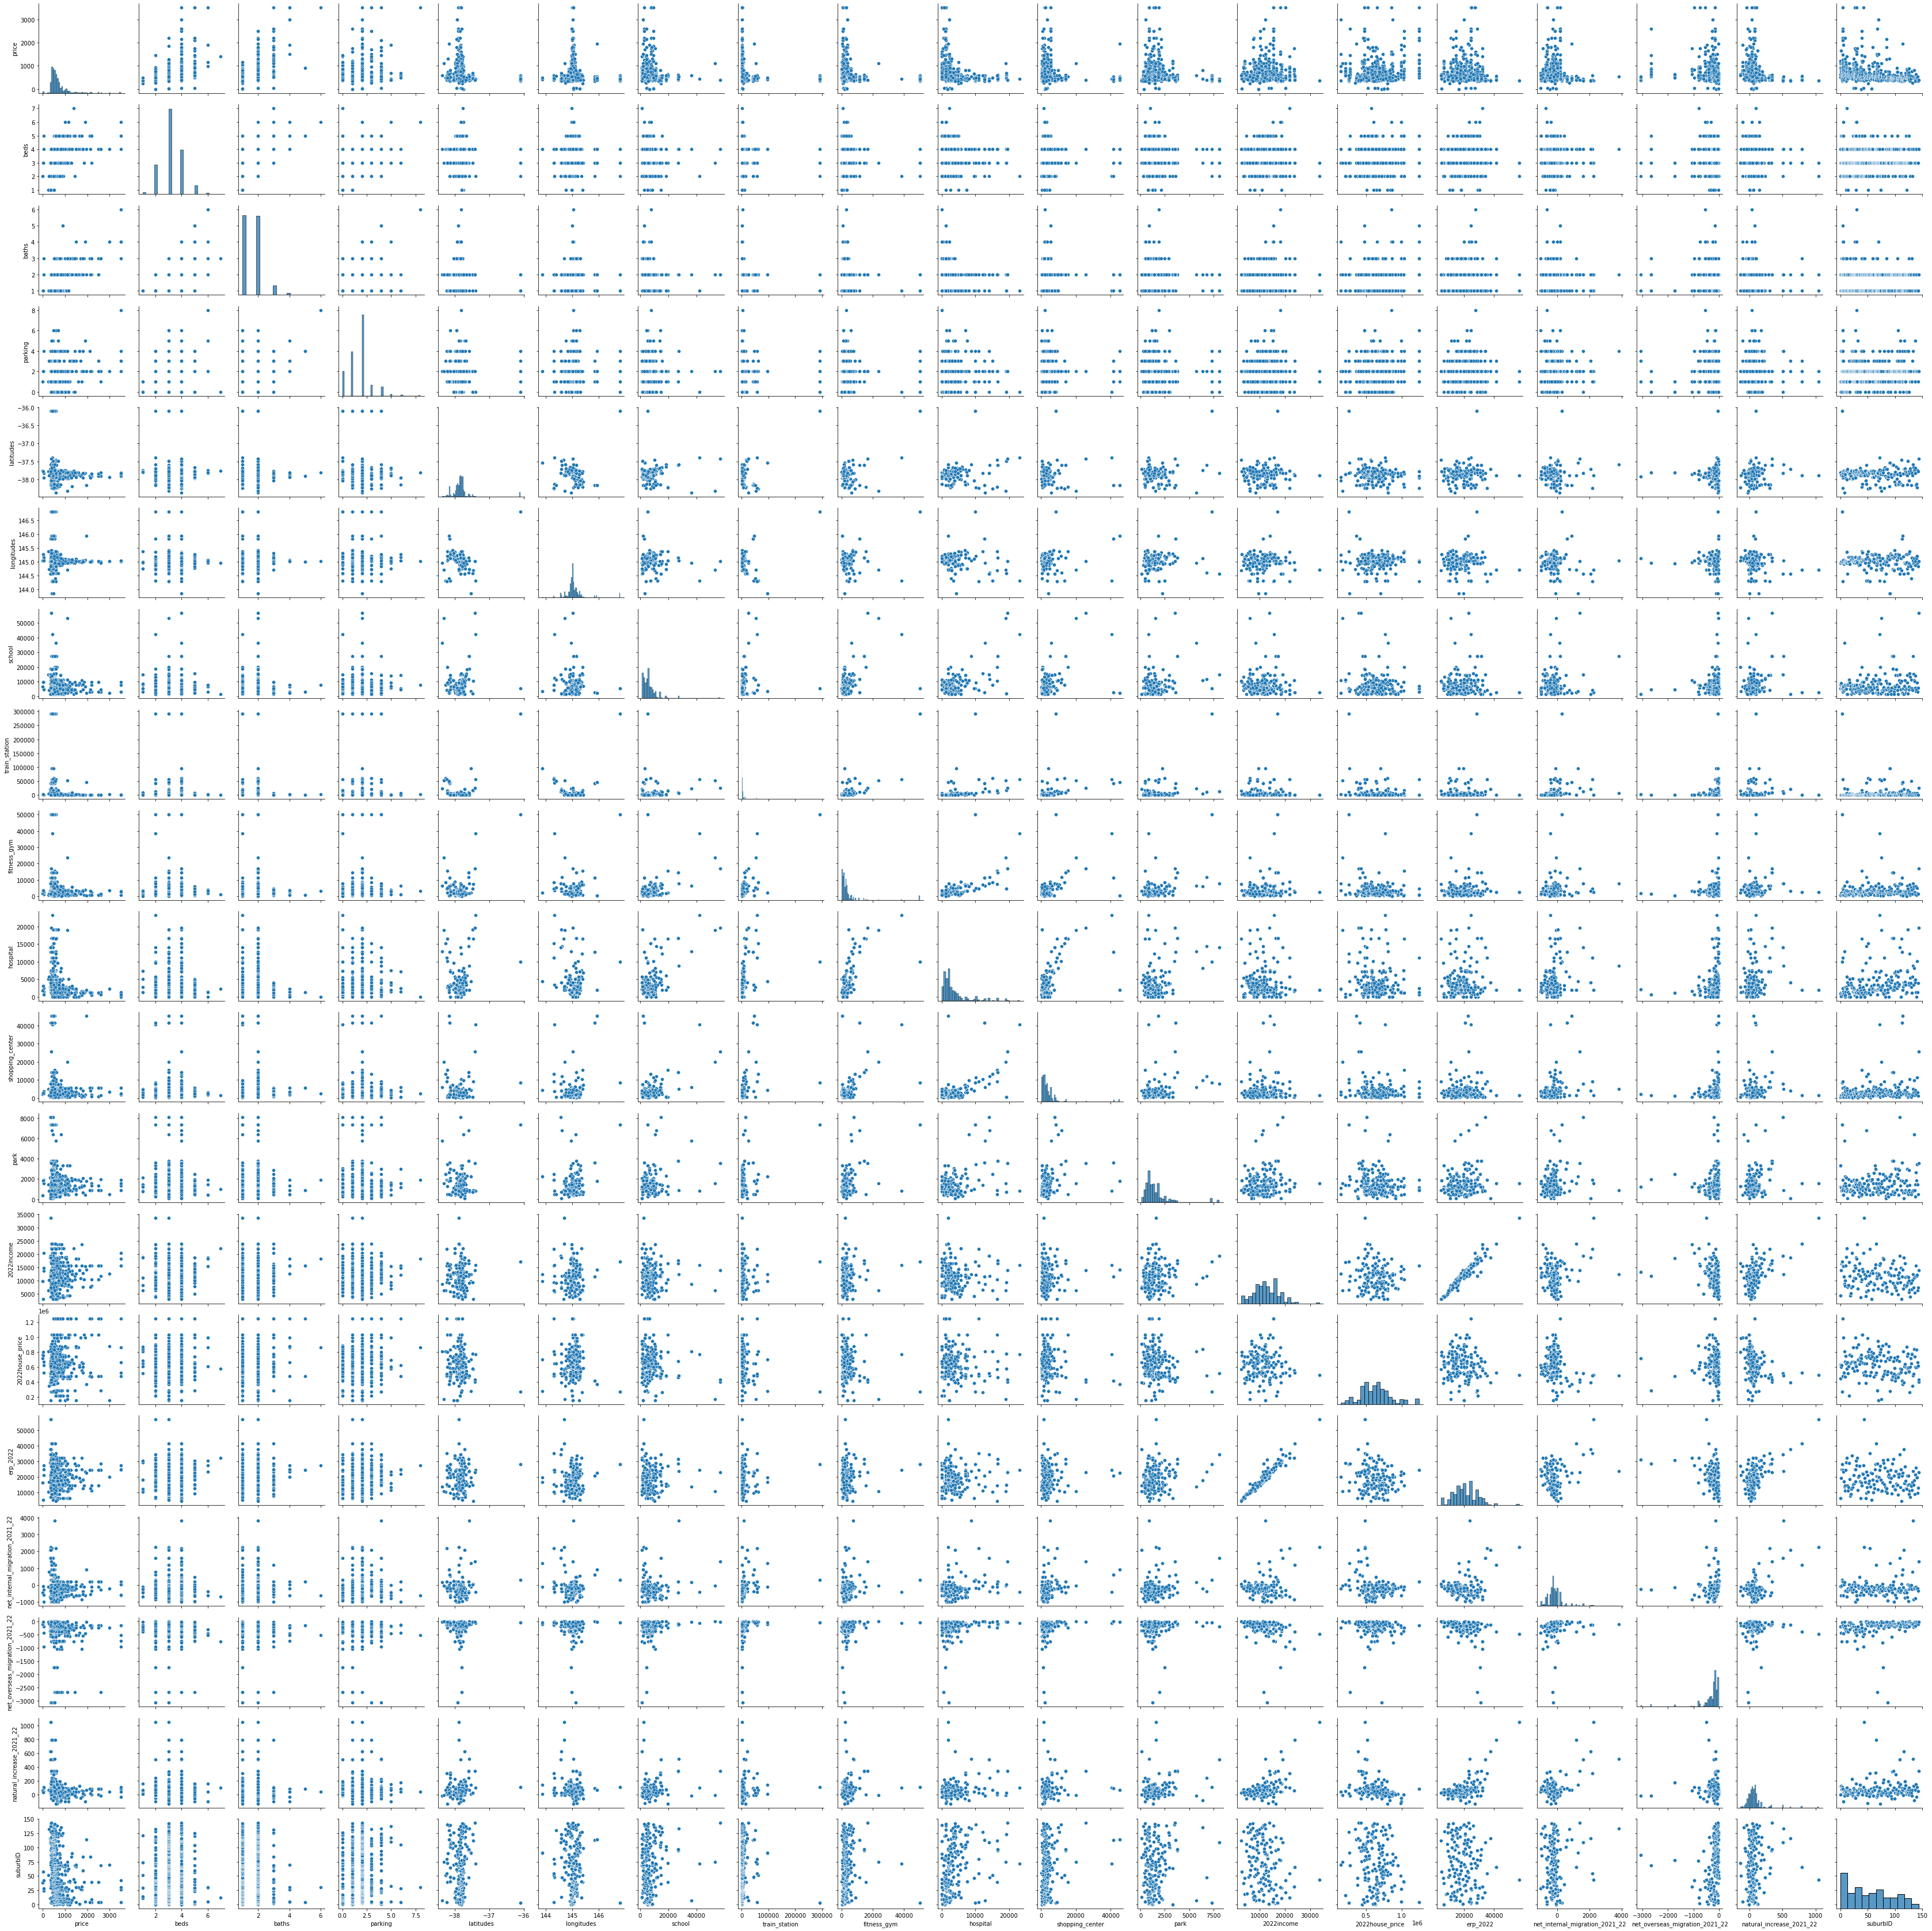

In [7]:
sns.pairplot(house)

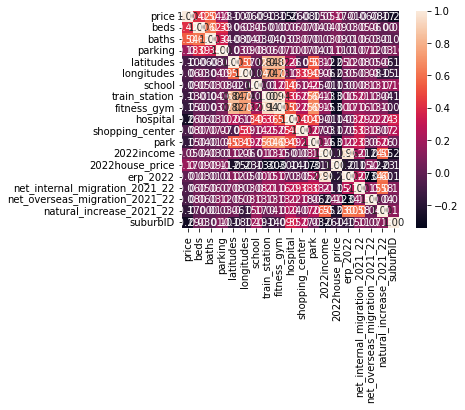

In [8]:
sns.heatmap(house.corr(),cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.savefig("../plots/house_corr_heatmap.png")
plt.show()

## Data split

In [9]:
# set prices as responses/labels
x = house.drop(["price", "suburb"], axis=1)
y = house["price"]

from sklearn.model_selection import train_test_split
# split training and test sets
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size=0.2)

## Data Visualization

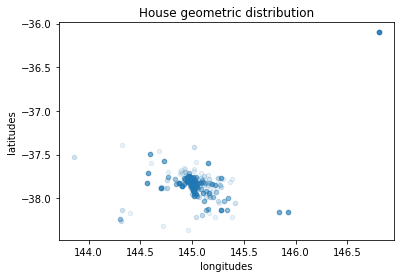

In [10]:
# check properties' distribution
house.plot(kind="scatter", x="longitudes", y="latitudes", alpha=0.1)
plt.title("House geometric distribution")
plt.savefig("../plots/house_geo_distribution.png")
plt.show()

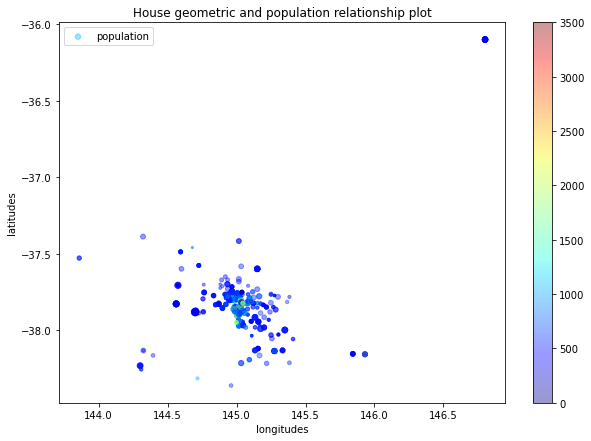

In [11]:
# the circle represents the population; the different colors represent \
# the house price from blue(low) to red(high)
camp1=plt.get_cmap("jet")
house.plot(kind="scatter", x="longitudes", y="latitudes", alpha=0.4,\
           s=house["erp_2022"]/1000, label="population", figsize=(10, 7),\
           c=house['price'], colormap=camp1, colorbar=True, sharex=False)
plt.title("House geometric and population relationship plot")
plt.savefig("../plots/house_pop_price_location.png")
plt.show()

In [12]:
house.columns

Index(['price', 'suburb', 'beds', 'baths', 'parking', 'latitudes',
       'longitudes', 'school', 'train_station', 'fitness_gym', 'hospital',
       'shopping_center', 'park', '2022income', '2022house_price', 'erp_2022',
       'net_internal_migration_2021_22', 'net_overseas_migration_2021_22',
       'natural_increase_2021_22', 'suburbID'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

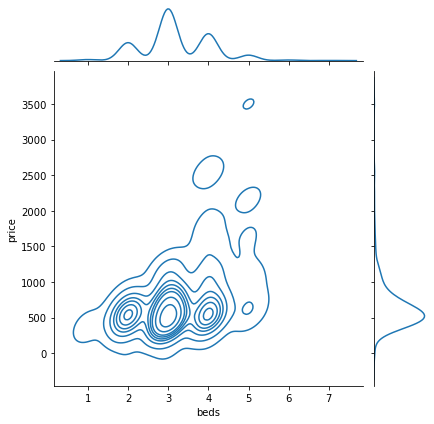

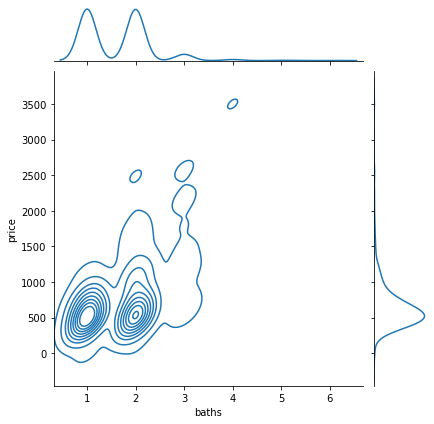

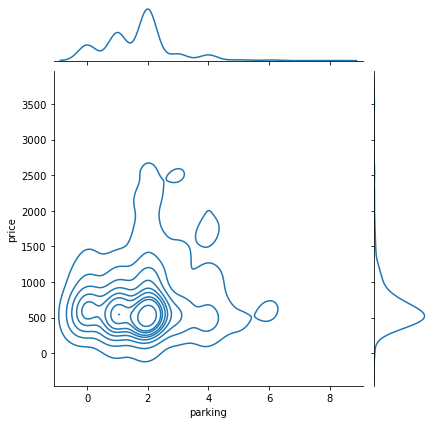

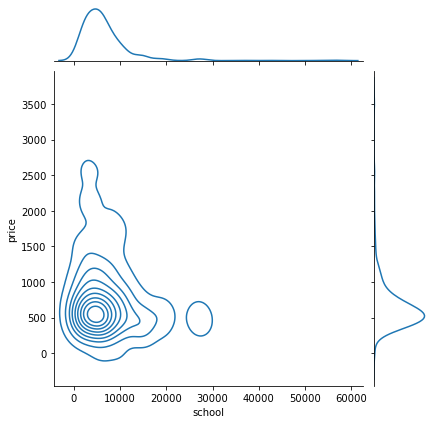

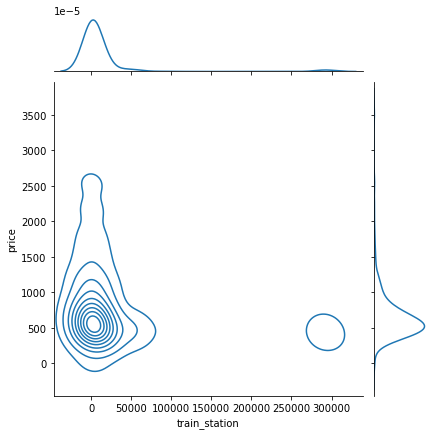

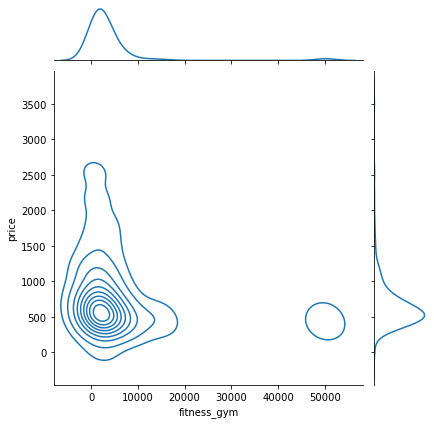

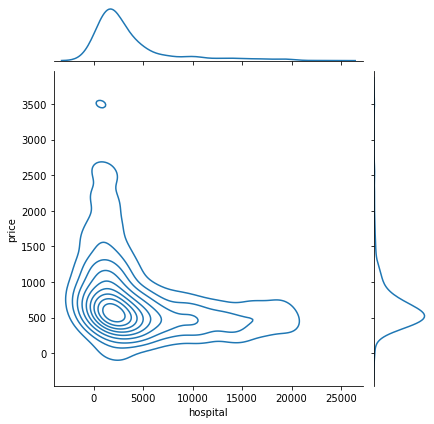

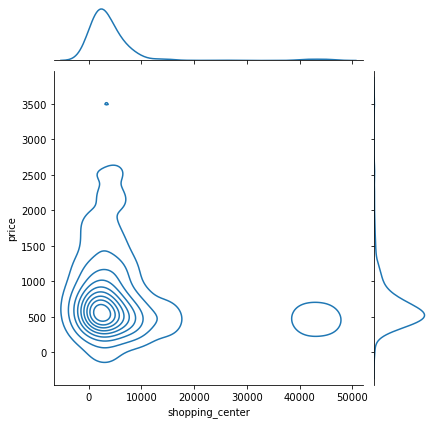

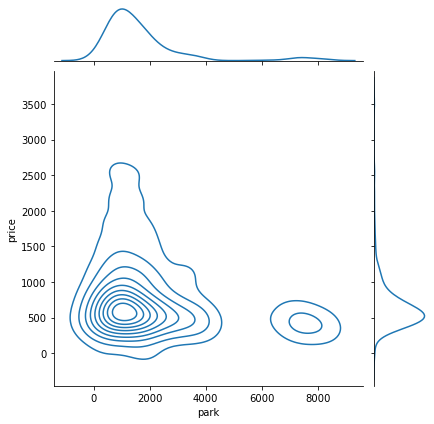

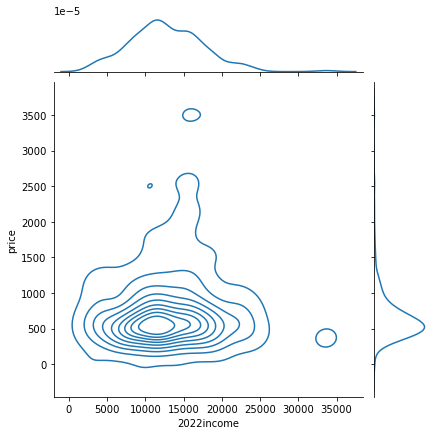

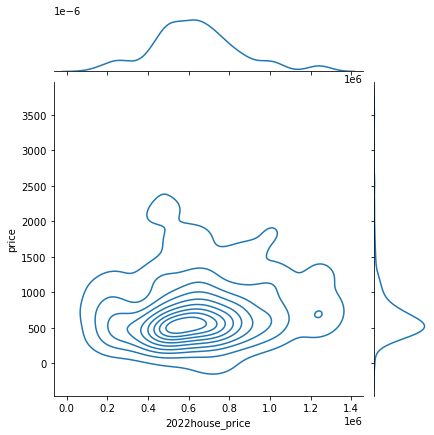

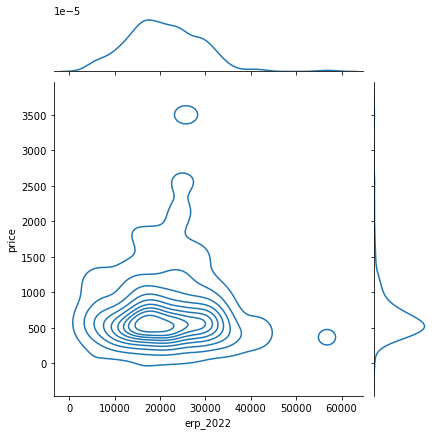

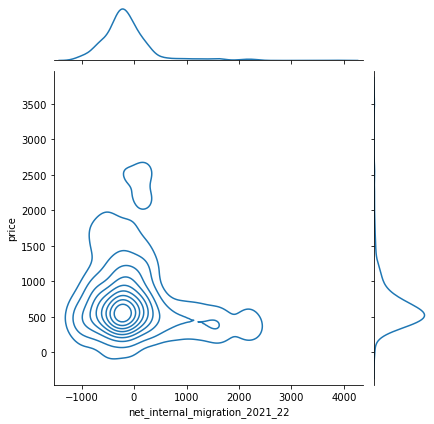

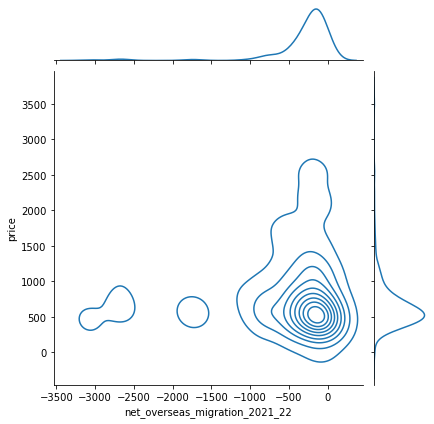

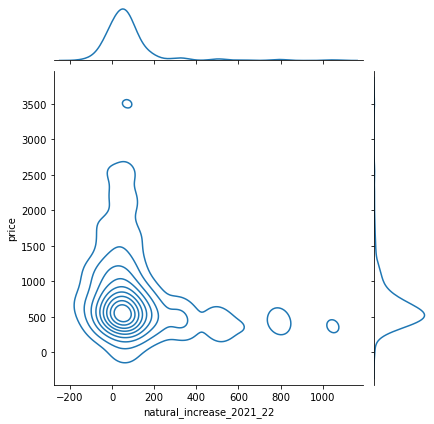

In [13]:
# Visualising the Correlation between each column and the target variable using jointplot 
plt.figure(figsize=(10,8))
sns.jointplot(x=house["beds"], y=house["price"],kind="kde")
sns.jointplot(x=house["baths"], y=house["price"], kind="kde")
sns.jointplot(x=house["parking"], y=house["price"], kind="kde")
sns.jointplot(x=house["school"], y=house["price"], kind="kde")
sns.jointplot(x=house["train_station"], y=house["price"], kind="kde")
sns.jointplot(x=house["fitness_gym"], y=house["price"], kind="kde")
sns.jointplot(x=house["hospital"], y=house["price"], kind="kde")
sns.jointplot(x=house["shopping_center"], y=house["price"], kind="kde")
sns.jointplot(x=house["park"], y=house["price"], kind="kde")
sns.jointplot(x=house["2022income"], y=house["price"], kind="kde")
sns.jointplot(x=house["2022house_price"], y=house["price"], kind="kde")
sns.jointplot(x=house["erp_2022"], y=house["price"], kind="kde")
sns.jointplot(x=house["net_internal_migration_2021_22"], y=house["price"], kind="kde")
sns.jointplot(x=house["net_overseas_migration_2021_22"], y=house["price"], kind="kde")
sns.jointplot(x=house["natural_increase_2021_22"], y=house["price"], kind="kde")
plt.show()

By setting the 'kind' parameter to 'kde', the JointPlot illustrates binary density curves on the main graph and unary density curves on the edges. We can see that beds and baths have the most concentrated graph, hence more correlated to price.

## Models

In [14]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [15]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

### KNN: predict house price

In [16]:
# Standardization

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(Xtrain)
x_test_scaled=scaler.transform(Xtest)

# train model
regressor=KNeighborsRegressor()
regressor.fit(x_train_scaled, Ytrain)

# predict
y_pred=regressor.predict(x_test_scaled)

# evaluate model
mae, mse, rmse, r_squared = evaluation(Ytest, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 197.52957746478873
MSE: 110885.05633802817
RMSE: 332.9940785329796
R2 Score: 0.41953168674446695


In [17]:
# add model performance to models dataframe
new_row = {"Model": "KNN","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

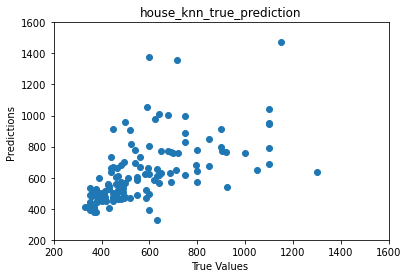

In [18]:
# plot model relationships between true and predicted values
plt.scatter(Ytest, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_knn_true_prediction")
plt.savefig("../plots/house_knn_true_prediction.png")
plt.show()

## Decision Tree

In [19]:
# same as KNN model
# the rest are the same
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train_scaled,Ytrain)
housing_predictions = tree_reg.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, housing_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 153.66314553990608
MSE: 97305.28423317685
RMSE: 311.9379493315567
R2 Score: 0.4906199620127569


In [20]:
new_row = {"Model": "Decision_Tree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

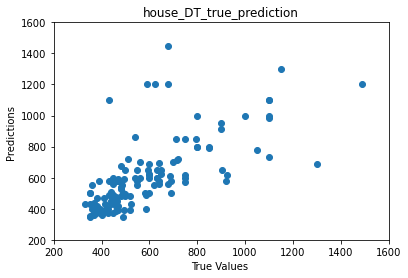

In [21]:
plt.scatter(Ytest, housing_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_DT_true_prediction")
plt.savefig("../plots/house_DT_true_prediction.png")
plt.show()

## xgboost

In [22]:
reg=XGBRegressor(n_estimators=1000,eta=0.05).fit(x_train_scaled,Ytrain)
print(reg.score(x_train_scaled,Ytrain))
pres=reg.predict(x_test_scaled)
mae, mse, rmse, r_squared = evaluation(Ytest, pres)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

0.9654056494877681
MAE: 121.19985854457802
MSE: 58160.131126509266
RMSE: 241.16411658144597
R2 Score: 0.6955395584522295


In [23]:
new_row = {"Model": "Xgboost","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

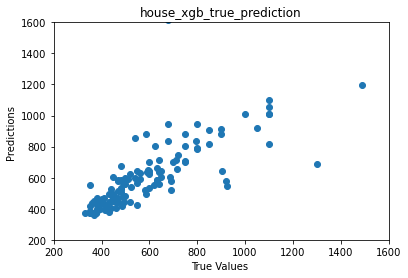

In [24]:
plt.scatter(Ytest, pres)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_xgb_true_prediction")
plt.savefig("../plots/house_xgb_true_prediction.png")
plt.show()

## Random Forest Regression

In [25]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train_scaled, Ytrain)
predictions = random_forest.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 138.94785818954125
MSE: 67638.50724369686
RMSE: 260.07404184904124
R2 Score: 0.6459215379646615


In [26]:
new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

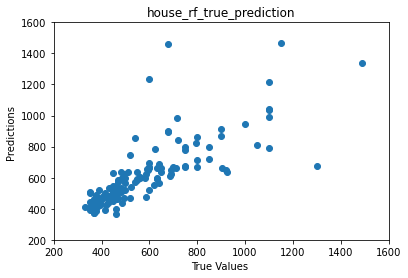

In [27]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_rf_true_prediction")
plt.savefig("../plots/house_rf_true_prediction.png")
plt.show()

## Ridge Regression

In [28]:
ridge = Ridge()
ridge.fit(x_train_scaled, Ytrain)
predictions = ridge.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 231.85278079510928
MSE: 120246.91736419362
RMSE: 346.76637288554036
R2 Score: 0.37052360704232146


In [29]:
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

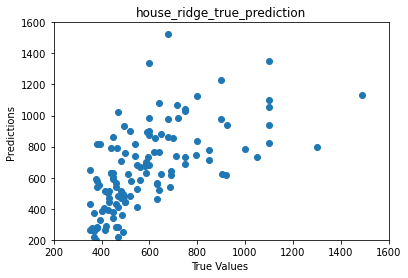

In [30]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_ridge_true_prediction")
plt.savefig("../plots/house_ridge_true_prediction.png")
plt.show()

## Lasso Regression

In [31]:
lasso = Lasso()
lasso.fit(x_train_scaled, Ytrain)
predictions = lasso.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 230.16956501753202
MSE: 119998.39871184417
RMSE: 346.40785024569544
R2 Score: 0.3718245686660596


In [32]:
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

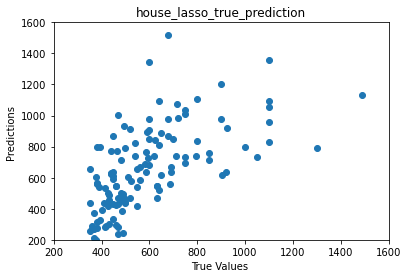

In [33]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_lasso_true_prediction")
plt.savefig("../plots/house_lasso_true_prediction.png")
plt.show()

## Elastic Net

In [34]:
elastic_net = ElasticNet()
elastic_net.fit(x_train_scaled, Ytrain)
predictions = elastic_net.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 217.002242093752
MSE: 117906.78790670399
RMSE: 343.3755784948953
R2 Score: 0.3827738691051161


In [35]:
new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

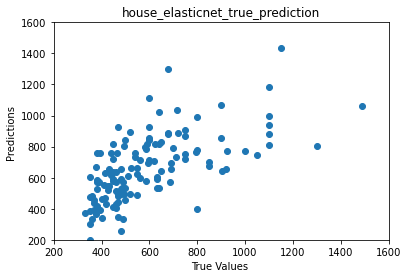

In [36]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_elasticnet_true_prediction")
plt.savefig("../plots/house_elasticnet_true_prediction.png")
plt.show()

## Data Correlation

In [37]:
house = house.rename(columns={'2022house_price':'houseprice', '2022income':'income'})

In [38]:
# find the correlation between features
corr_matrix = house.corr()

In [39]:
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
baths                             0.541754
beds                              0.415146
parking                           0.177256
houseprice                        0.167080
income                            0.053142
erp_2022                         -0.006922
net_internal_migration_2021_22   -0.062589
longitudes                       -0.064829
shopping_center                  -0.077305
net_overseas_migration_2021_22   -0.079844
school                           -0.093755
latitudes                        -0.098205
train_station                    -0.126520
park                             -0.147895
fitness_gym                      -0.150629
natural_increase_2021_22         -0.170805
hospital                         -0.264789
suburbID                         -0.287729
Name: price, dtype: float64

## Linear Regression: use ols model 

In [40]:
# fit a ols model
fitter = ols(
    formula="price ~ beds + baths + parking  + school + train_station + fitness_gym + hospital + shopping_center + park + suburbID",
    data=house
).fit()
print(fitter.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     52.92
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           8.04e-79
Time:                        23:43:57   Log-Likelihood:                -5121.7
No. Observations:                 706   AIC:                         1.027e+04
Df Residuals:                     695   BIC:                         1.032e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         186.6269     55.342     

Select useful columns for prediction x is indenpendent variable y is dependent variable


In [41]:
# extract useful columns
x = house[['beds', 'baths', 'parking', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', 'income', 'houseprice',
        'erp_2022', 'net_internal_migration_2021_22',
       'net_overseas_migration_2021_22', 'natural_increase_2021_22',
       'suburbID']]
y = house['price']

Split training and testing data

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Build an OLS regression model

In [43]:
# train the model
lm = sm.OLS(y_train,x_train)
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                              176.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                   4.13e-204
Time:                        23:43:57   Log-Likelihood:                         -4084.7
No. Observations:                 564   AIC:                                      8201.
Df Residuals:                     548   BIC:                                      8271.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [44]:
# choose for best features
fitter = ols(
    formula="price ~ beds + baths + parking  + school + train_station + hospital\
    + income + houseprice + erp_2022 + net_internal_migration_2021_22 + park + natural_increase_2021_22 + suburbID",
    data=house
).fit()
print(fitter.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     43.66
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           4.31e-81
Time:                        23:43:57   Log-Likelihood:                -5110.1
No. Observations:                 706   AIC:                         1.025e+04
Df Residuals:                     692   BIC:                         1.031e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Define the  evaluation metric

In [45]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# model performance evaluation
def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Predict for test and train & show evaluation accuracy


In [46]:
test_pred = fitter.predict(x_test)
train_pred = fitter.predict(x_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)


Test set evaluation:

MAE: 221.48119432991683
MSE: 104426.67753835415
RMSE: 323.1511682453804
R2 Square 0.43644785269454134
Train set evaluation:

MAE: 214.27042722697996
MSE: 115619.07381719882
RMSE: 340.02804857422984
R2 Square 0.4537004754796915


In [47]:
# add model performance to models dataframe
new_row = {"Model": "OLS","MAE": 211.9437839964328, "MSE": 112251.43293166216, "RMSE": 335.03944981399155, "R2 Score": 0.47819702703918054}
models = models.append(new_row, ignore_index=True)

Predict value and true value correlation scatter plot

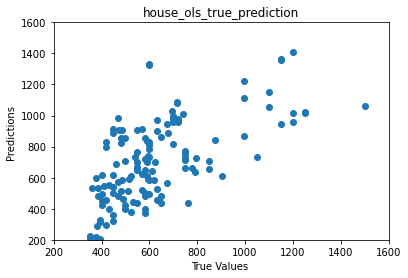

In [48]:
plt.scatter(y_test, test_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("house_ols_true_prediction")
plt.savefig("../plots/house_ols_true_prediction.png")
plt.show()

## Neural Network Model (MLP)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import  metrics

In [50]:
# train on the model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500), random_state=1)
clf.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=3500, random_state=1,
              solver='lbfgs')

In [51]:
# prediction
predicted = clf.predict(x_train)
expected = y_train

In [52]:
# evaluation on model performance
def cv_mlp_model(x_train, y_train, hidden_size, learn_rate):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_size,max_iter=1000,solver='adam',verbose=10,learning_rate_init=learn_rate)
    # do 10-fold cross validation
    scores = cross_val_score(mlp, x_train, y_train, cv=10)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    return scores

In [53]:
mlp = cv_mlp_model(x_train,y_train,20,0.5)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Iteration 1, loss = 35.97270437
Iteration 2, loss = 28.63967252
Iteration 3, loss = 4.63492177
Iteration 4, loss = 4.61744797
Iteration 5, loss = 4.67536323
Iteration 6, loss = 4.70303578
Iteration 7, loss = 4.68643336
Iteration 8, loss = 4.67160935
Iteration 9, loss = 4.67126057
Iteration 10, loss = 4.66235422
Iteration 11, loss = 4.65233419
Iteration 12, loss = 4.64610920
Iteration 13, loss = 4.63812669
Iteration 14, loss = 4.62388861
Iteration 15, loss = 4.60966756
Iteration 16, loss = 4.59749924
Iteration 17, loss = 4.58442470
Iteration 18, loss = 4.57281121
Iteration 19, loss = 4.56028432
Iteration 20, loss = 4.54099870
Iteration 21, loss = 4.53237865
Iteration 22, loss = 4.52481767
Iteration 23, loss = 4.51336588
Iteration 24, loss = 4.50017831
Iteration 25, loss = 4.48965357
Iteration 26, loss = 4.48208205
Iteration 27, loss = 4.48435241
Iteration 28, loss = 4.47584324
Iteration 29, loss = 4.47884957
Iteration 30, loss = 4.47577563
Iteration 31, loss = 4.47552840
Iteration 32, l

MLP performance bad



In [54]:
# sort models dataframe to show performance of each model
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
2,Xgboost,121.199859,58160.131127,241.164117,0.695540
3,RandomForestRegressor,138.947858,67638.507244,260.074042,0.645922
1,Decision_Tree,153.663146,97305.284233,311.937949,0.490620
0,KNN,197.529577,110885.056338,332.994079,0.419532
7,OLS,211.943784,112251.432932,335.039450,0.478197
6,ElasticNet,217.002242,117906.787907,343.375578,0.382774
5,Lasso,230.169565,119998.398712,346.407850,0.371825
4,Ridge,231.852781,120246.917364,346.766373,0.370524


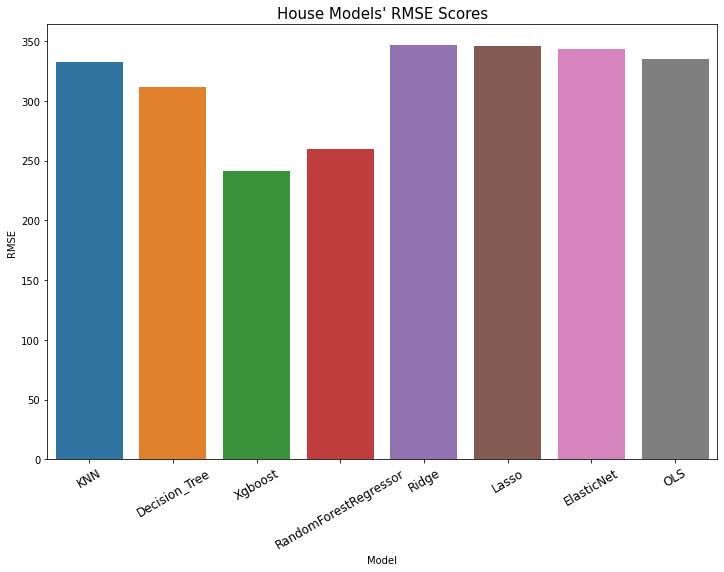

In [55]:
# plot each model's RMSE scores and compare
# in order to choose the best model
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("House Models' RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.savefig("../plots/house_models_performance.png")
plt.show()

The Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction error). The residual measures the distance of the data points in the regression line; RMSE measures the extent to which these residuals are distributed. In other words, it indicates how concentrated the data is around the best-fit line. If the RMSE for the test set is much higher than that of the training set, it is likely that the data badly overfitted. Therefore, from the plot Models' RMSE Scores, it is evident that Xgboost model has the lowest RMSE and it is the best models among them. 